In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
from datetime import datetime as dt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import datetime

In [2]:
df_main = pd.read_csv("/Users/simranaswani/Downloads/startup data.csv")

In [3]:
df_main.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [4]:
df_main.isna().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

In [5]:
cols_to_drop = ['Unnamed: 0','Unnamed: 6','state_code.1','latitude','longitude','labels']

In [6]:
df_main.drop(cols_to_drop,axis=1,inplace=True)

In [7]:
df_main[df_main['status']== 'closed'].count() #326 are closed 
df_main[df_main['status']== 'acquired'].count() #597 are acquired

state_code                  597
zip_code                    597
id                          597
city                        597
name                        597
founded_at                  597
closed_at                     9
first_funding_at            597
last_funding_at             597
age_first_funding_year      597
age_last_funding_year       597
age_first_milestone_year    550
age_last_milestone_year     550
relationships               597
funding_rounds              597
funding_total_usd           597
milestones                  597
is_CA                       597
is_NY                       597
is_MA                       597
is_TX                       597
is_otherstate               597
category_code               597
is_software                 597
is_web                      597
is_mobile                   597
is_enterprise               597
is_advertising              597
is_gamesvideo               597
is_ecommerce                597
is_biotech                  597
is_consu

In [8]:
df_copy = df_main.copy()

In [9]:
df_copy.columns

Index(['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [10]:
df_copy

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,92101,c:6669,San Diego,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,95032,c:16283,Los Gatos,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,92121,c:65620,San Diego,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,95014,c:42668,Cupertino,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,94105,c:65806,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,CoTweet,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,MA,1803,c:41747,Burlington,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,CA,94089,c:31549,Sunnyvale,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,CA,94404,c:33198,San Francisco,Causata,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [11]:
df_copy.dtypes

state_code                   object
zip_code                     object
id                           object
city                         object
name                         object
founded_at                   object
closed_at                    object
first_funding_at             object
last_funding_at              object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising              

In [12]:
def change_into_datetime(col):
    df_copy[col] = pd.to_datetime(df_copy[col])

In [13]:
col_to_datetime = ['founded_at','closed_at','first_funding_at', 'last_funding_at']
for feature in col_to_datetime:
    change_into_datetime(feature)

In [14]:
df_copy.dtypes

state_code                          object
zip_code                            object
id                                  object
city                                object
name                                object
founded_at                  datetime64[ns]
closed_at                   datetime64[ns]
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
is_CA                                int64
is_NY                                int64
is_MA                                int64
is_TX                                int64
is_otherstate                        int64
category_code                       object
is_software

In [15]:
df_copy.drop('object_id',axis=1,inplace=True)

In [16]:
df_copy.columns

Index(['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [17]:
df_copy['closed_at'].isnull().sum()

588

In [18]:
df_copy

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,92101,c:6669,San Diego,Bandsintown,2007-01-01,NaT,2009-04-01,2010-01-01,2.2493,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,CA,95032,c:16283,Los Gatos,TriCipher,2000-01-01,NaT,2005-02-14,2009-12-28,5.1260,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,CA,92121,c:65620,San Diego,Plixi,2009-03-18,NaT,2010-03-30,2010-03-30,1.0329,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,CA,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,NaT,2005-02-17,2007-04-25,3.1315,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,CA,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.0000,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,CoTweet,2009-01-01,NaT,2009-07-09,2009-07-09,0.5178,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,MA,1803,c:41747,Burlington,Reef Point Systems,1998-01-01,2008-06-25,2005-04-01,2007-03-23,7.2521,...,1,1,0,0,1,0,0,2.6667,1,closed
920,CA,94089,c:31549,Sunnyvale,Paracor Medical,1999-01-01,2012-06-17,2007-06-29,2007-06-29,8.4959,...,0,0,0,0,0,0,1,8.0000,1,closed
921,CA,94404,c:33198,San Francisco,Causata,2009-01-01,NaT,2009-10-05,2011-11-01,0.7589,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [19]:
df_copy[df_copy['status']=='closed'].count()

state_code                  326
zip_code                    326
id                          326
city                        326
name                        326
founded_at                  326
closed_at                   326
first_funding_at            326
last_funding_at             326
age_first_funding_year      326
age_last_funding_year       326
age_first_milestone_year    221
age_last_milestone_year     221
relationships               326
funding_rounds              326
funding_total_usd           326
milestones                  326
is_CA                       326
is_NY                       326
is_MA                       326
is_TX                       326
is_otherstate               326
category_code               326
is_software                 326
is_web                      326
is_mobile                   326
is_enterprise               326
is_advertising              326
is_gamesvideo               326
is_ecommerce                326
is_biotech                  326
is_consu

In [20]:
df_copy['status'] = df_copy.status.map({'acquired':1, 'closed':0})

In [21]:
df_copy.dtypes

state_code                          object
zip_code                            object
id                                  object
city                                object
name                                object
founded_at                  datetime64[ns]
closed_at                   datetime64[ns]
first_funding_at            datetime64[ns]
last_funding_at             datetime64[ns]
age_first_funding_year             float64
age_last_funding_year              float64
age_first_milestone_year           float64
age_last_milestone_year            float64
relationships                        int64
funding_rounds                       int64
funding_total_usd                    int64
milestones                           int64
is_CA                                int64
is_NY                                int64
is_MA                                int64
is_TX                                int64
is_otherstate                        int64
category_code                       object
is_software

In [22]:
describeNum = df_copy.describe()
describeNum.T.style

,count,mean,std,min,25%,50%,75%,max
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000
milestones,923.000000,1.841820,1.322632,0.000000,1.000000,2.000000,3.000000,8.000000
is_CA,923.000000,0.527627,0.499507,0.000000,0.000000,1.000000,1.000000,1.000000
is_NY,923.000000,0.114843,0.319005,0.000000,0.000000,0.000000,0.000000,1.000000


In [23]:
null=pd.DataFrame(df_copy.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df_copy.isna().sum()/len(df_copy)*100)
null = null[null["% Missing Values"] > 0]
null.style

,Null Values,% Missing Values
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039


In [24]:
df_copy['age_first_milestone_year'] = df_copy['age_first_milestone_year'].fillna(value="0")
df_copy['age_last_milestone_year'] = df_copy['age_last_milestone_year'].fillna(value="0")

In [25]:
null=pd.DataFrame(df_copy.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df_copy.isna().sum()/len(df_copy)*100)
null = null[null["% Missing Values"] > 0]
null.style

,Null Values,% Missing Values
closed_at,588,63.705309


In [26]:
df_copy.columns
df_copy['age_first_milestone_year']=df_copy['age_first_milestone_year'].astype(float)
df_copy['age_last_milestone_year']=df_copy['age_last_milestone_year'].astype(float)


In [27]:
df_cat = df_copy.select_dtypes(include='object')
df_cat.head()

,state_code,zip_code,id,city,name,category_code
0,CA,92101,c:6669,San Diego,Bandsintown,music
1,CA,95032,c:16283,Los Gatos,TriCipher,enterprise
2,CA,92121,c:65620,San Diego,Plixi,web
3,CA,95014,c:42668,Cupertino,Solidcore Systems,software
4,CA,94105,c:65806,San Francisco,Inhale Digital,games_video


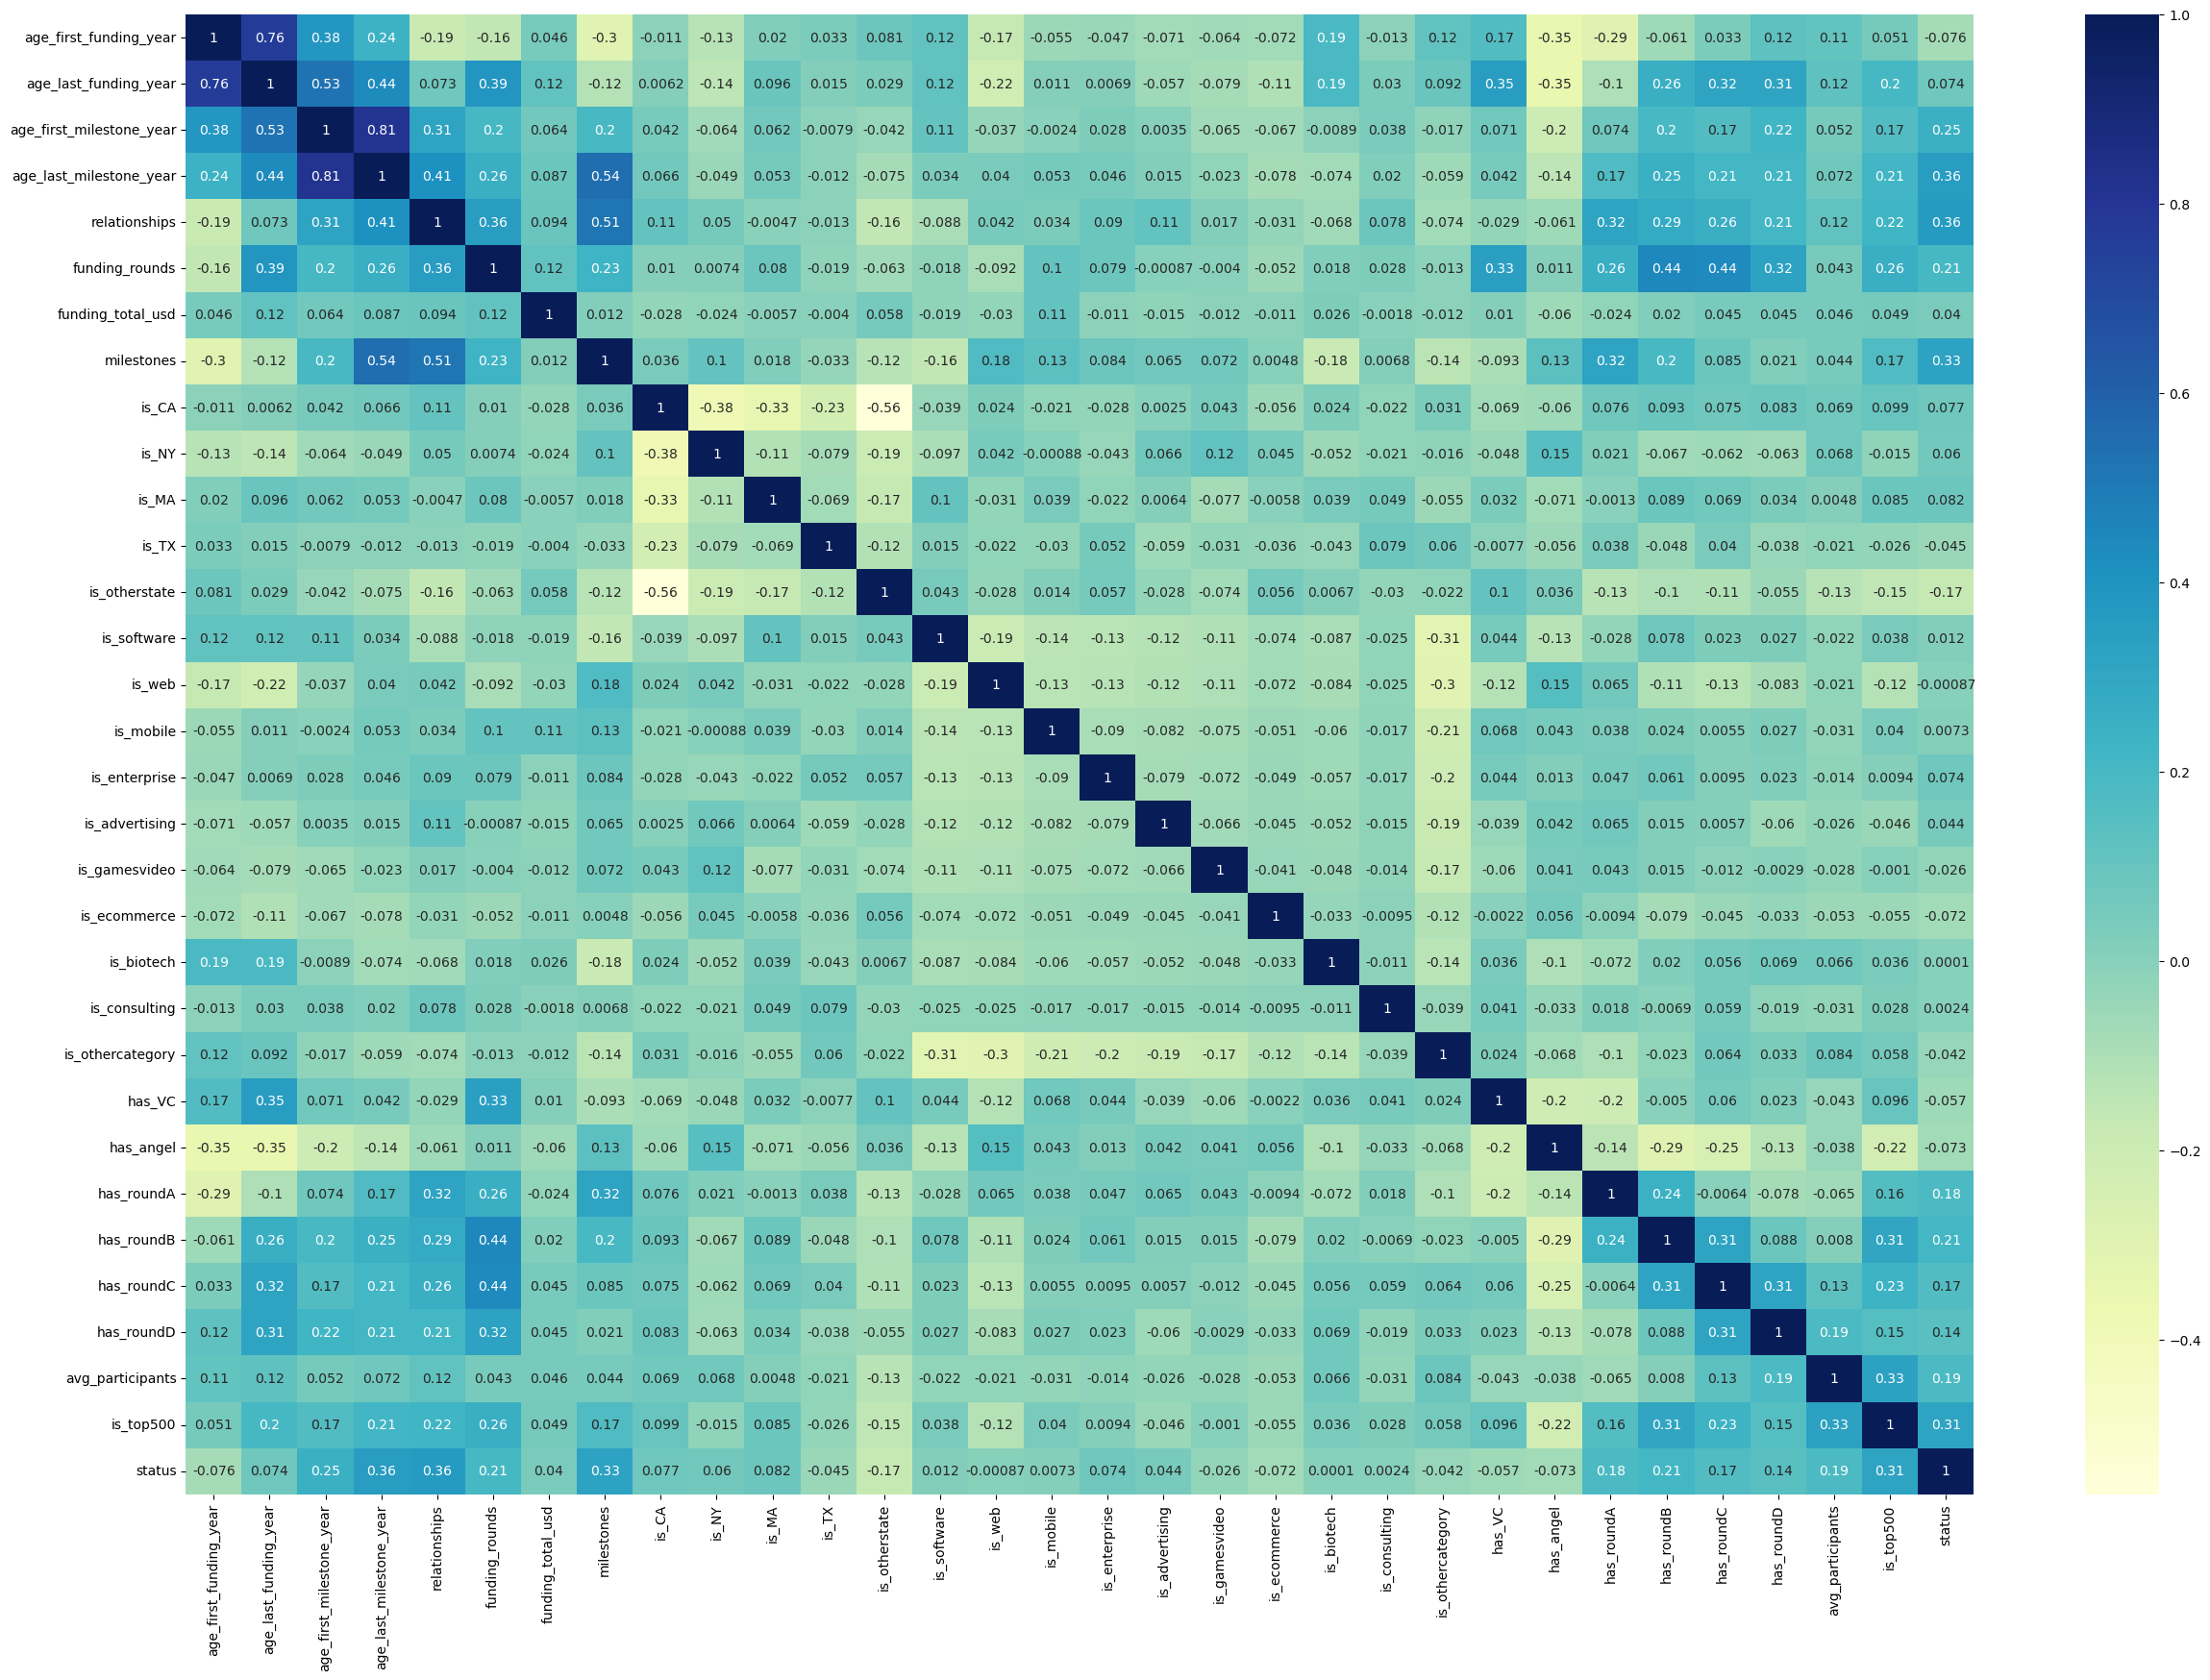

In [28]:
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']
plt.figure(figsize=(30,20))
ax = sns.heatmap(data = df_copy[features].corr(),cmap='YlGnBu',annot=True)

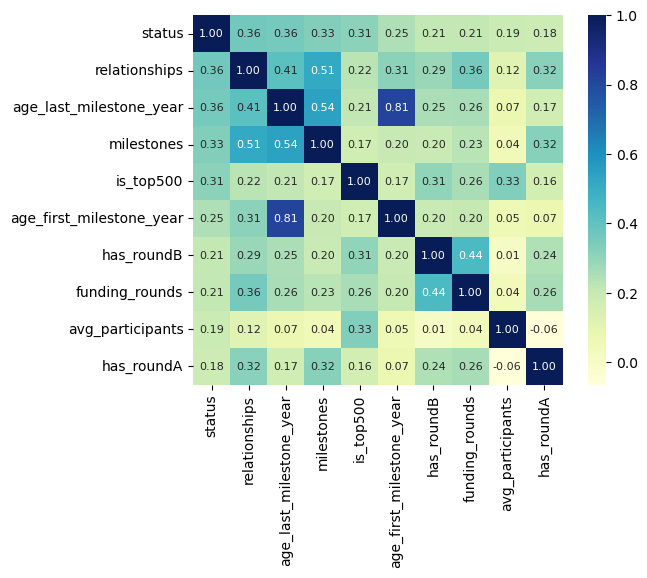

In [29]:
#number of variables for heatmap
cols = df_copy[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(df_copy[cols].values.T) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)


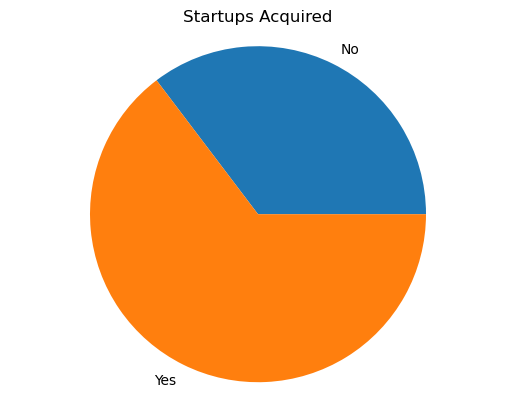

In [30]:
value_counts = df_copy["status"].value_counts().to_dict()
fig, ax = plt.subplots()
pie = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'])
pie = ax.axis('equal')
pie = ax.set_title('Startups Acquired')

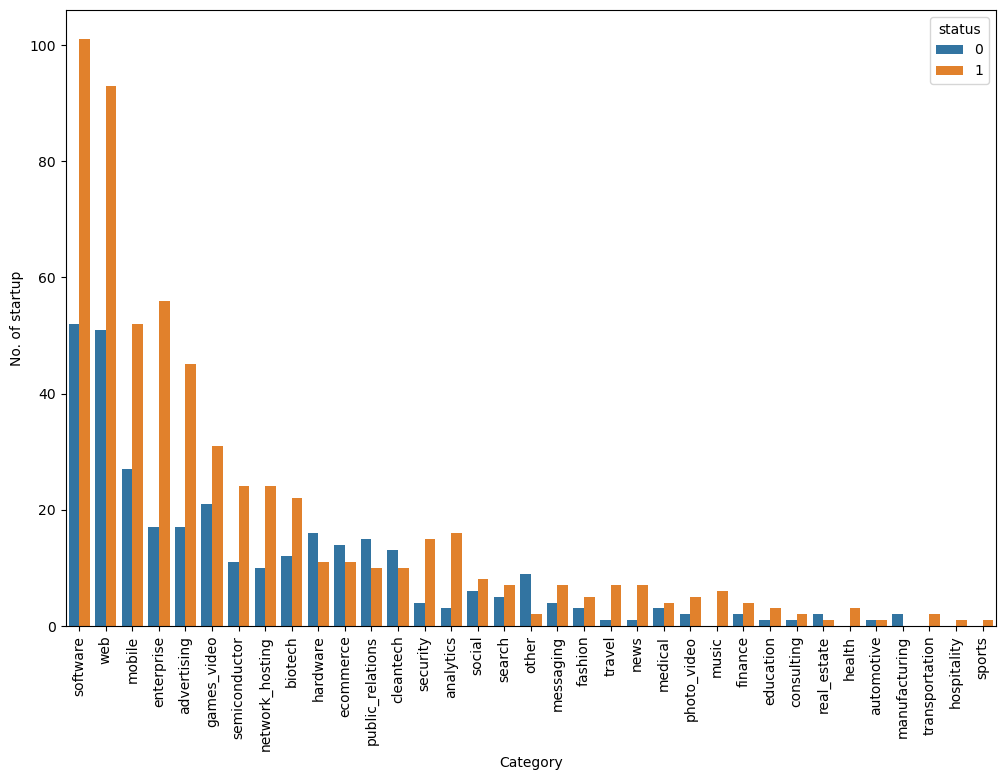

In [31]:
fig, ax = plt.subplots(figsize=(12,8))

bar = sns.countplot(x="category_code", hue="status", data=df_copy,
              order=df_copy.category_code.value_counts().index)

bar = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
bar = ax.set(xlabel="Category", ylabel="No. of startup")

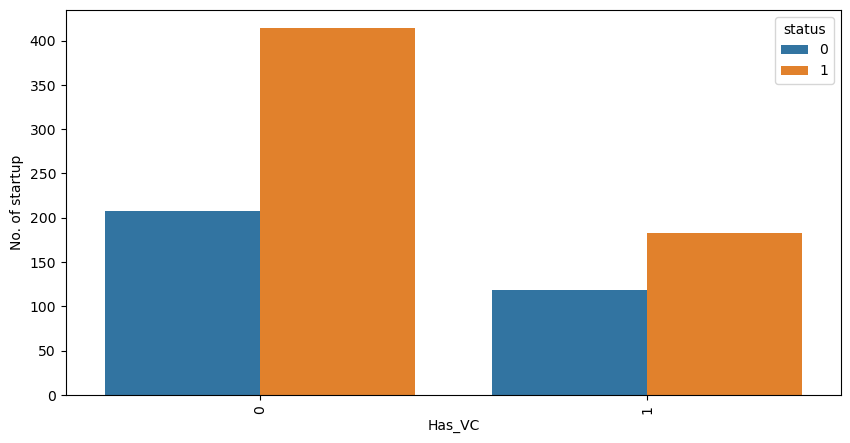

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

bar1 = sns.countplot(x="has_VC", hue="status", data=df_copy,
              order=df_copy.has_VC.value_counts().index)
bar1 = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
bar1= ax.set(xlabel="Has_VC", ylabel="No. of startup")


In [33]:
df_acquired = df_copy[(df_copy["status"] == True)]
df_closed = df_copy[(df_copy["status"] == False)]

In [34]:
#out of the acquired statups how many are in the top 500
df_acquired["is_top500"].value_counts(normalize=True)

1    0.899497
0    0.100503
Name: is_top500, dtype: float64

In [35]:
duplicate = df_copy[df_copy.duplicated()] 
duplicate

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
832,CA,94538,c:28482,Fremont,Redwood Systems,2008-01-01,NaT,2008-10-03,2012-05-30,0.7562,...,1,1,0,1,1,1,0,2.25,1,1


In [36]:
df_copy= df_copy.drop(duplicate.index)

In [37]:
duplicate = df_copy[df_copy.duplicated()] 
duplicate

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status


In [38]:
ffy_neg = (df_copy['age_first_funding_year'] < 0).sum().sum()
lfy_neg = (df_copy['age_last_funding_year'] < 0).sum().sum()
fmy_neg = (df_copy['age_first_milestone_year'] < 0).sum().sum()
lmy_neg = (df_copy['age_last_milestone_year'] < 0).sum().sum()
print(ffy_neg,lfy_neg,fmy_neg,lmy_neg)

46 13 46 12


In [39]:
df_copy=df_copy.drop(df_copy[df_copy.age_first_funding_year<0].index)
df_copy=df_copy.drop(df_copy[df_copy.age_last_funding_year<0].index)
df_copy=df_copy.drop(df_copy[df_copy.age_first_milestone_year<0].index)
df_copy=df_copy.drop(df_copy[df_copy.age_last_milestone_year<0].index)

In [40]:
ffy_neg = (df_copy['age_first_funding_year'] < 0).sum().sum()
lfy_neg = (df_copy['age_last_funding_year'] < 0).sum().sum()
fmy_neg = (df_copy['age_first_milestone_year'] < 0).sum().sum()
lmy_neg = (df_copy['age_last_milestone_year'] < 0).sum().sum()

print(ffy_neg,lfy_neg,fmy_neg,lmy_neg)

0 0 0 0


In [41]:
df_copy.columns

Index(['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

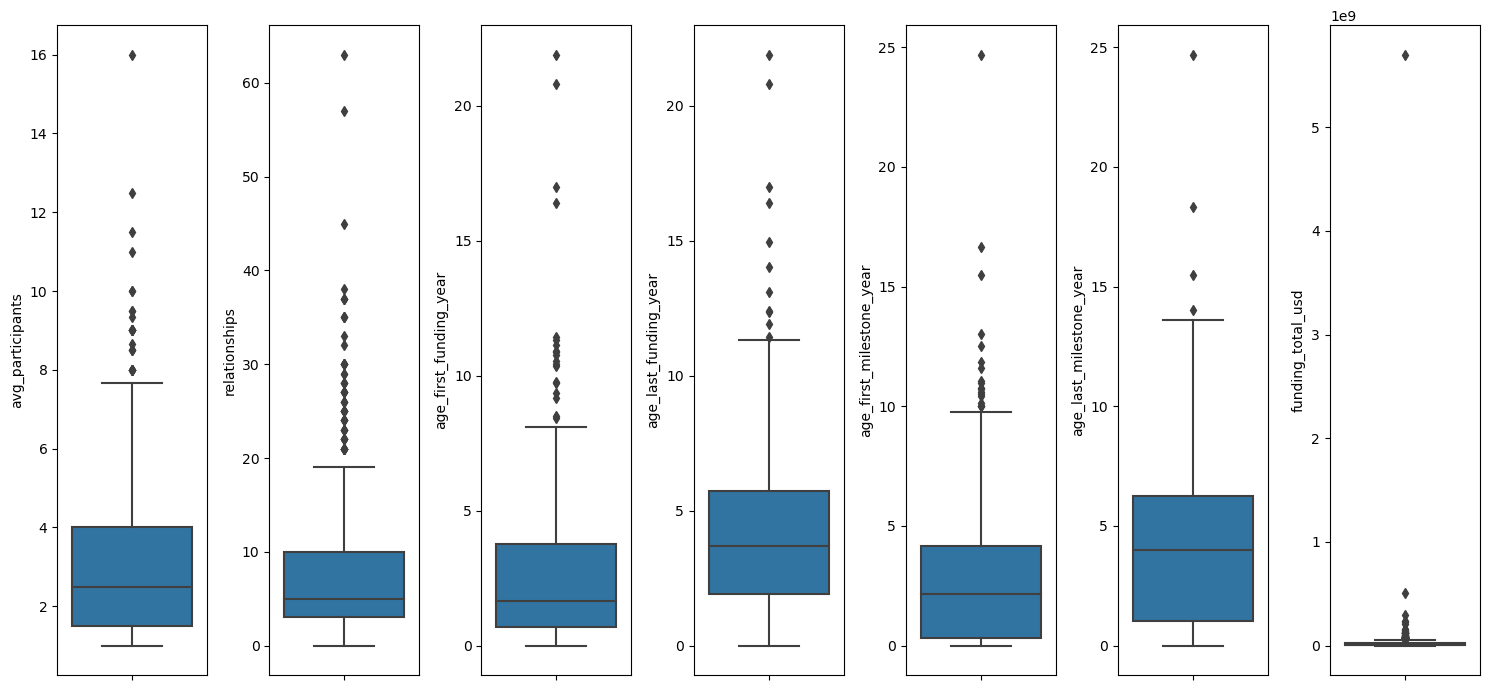

In [42]:
#finding outliers
featuresNumfinal = ['avg_participants','relationships','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df_copy[featuresNumfinal[i]], orient='v')
    plt.tight_layout()

In [43]:
import scipy.stats as stats

In [44]:
#def plot_outl(df,col):
    #fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    #sns.histplot(df[col],ax=ax1)
    #sns.histplot(df[col],ax=ax2,kde=True)
    #stats.probplot(df[col],plot=plt)

In [45]:
def plot_outl2(df,col):
    figure, axis = plt.subplots(2, 2) 
    sns.histplot(df[col],ax=axis[0, 0])
    sns.kdeplot(df[col],ax=axis[0,1])
    stats.probplot(df[col],plot=axis[1,0])
    sns.histplot(df[col],ax=axis[1, 1])

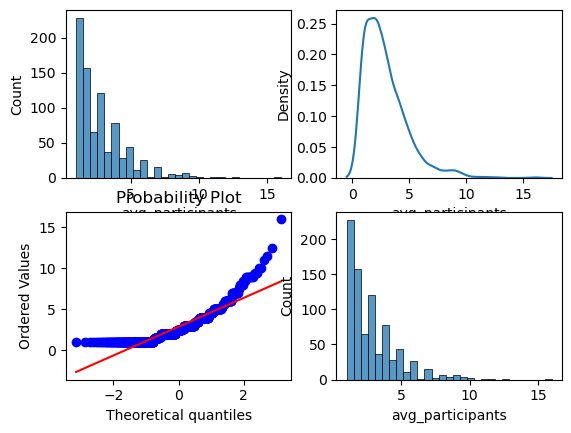

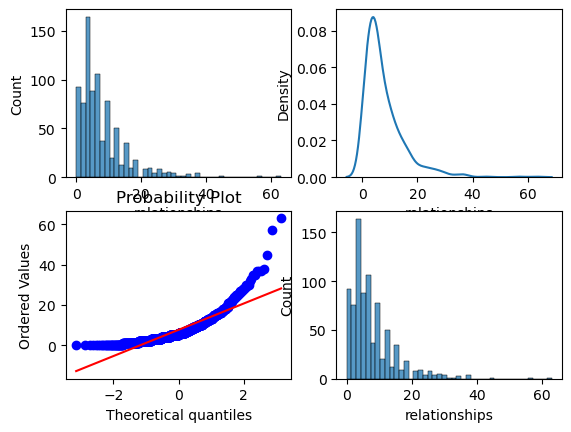

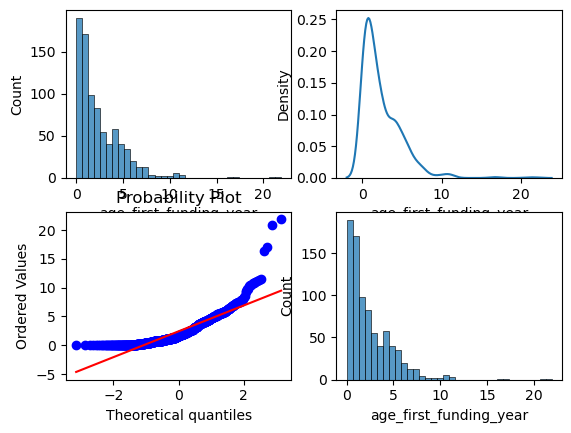

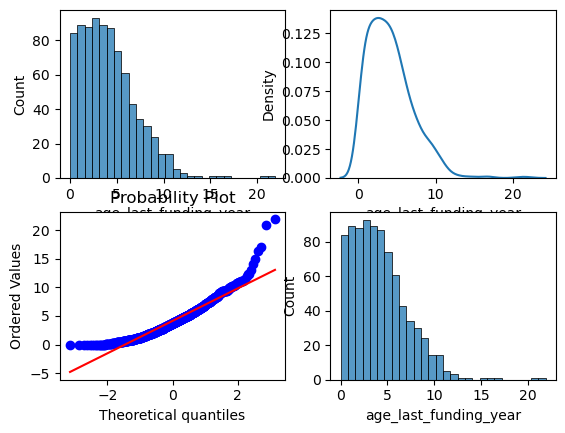

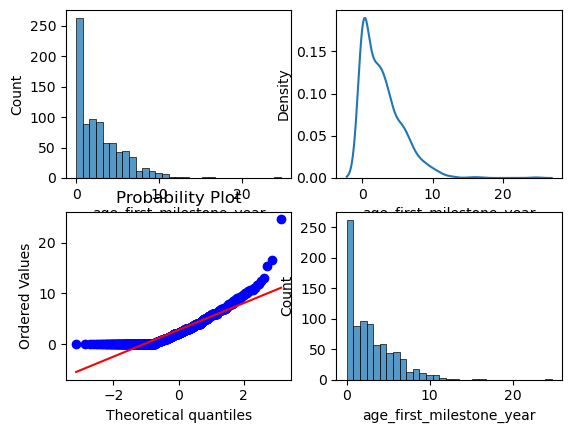

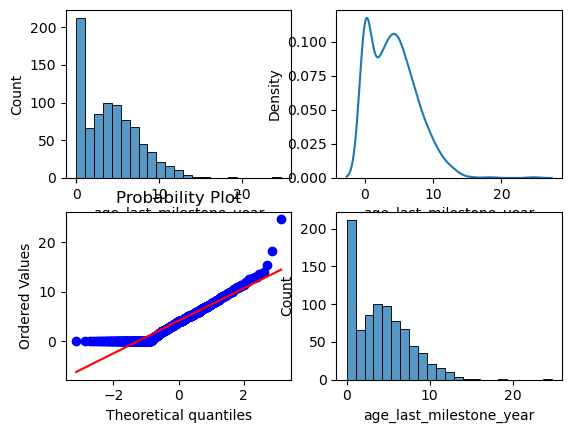

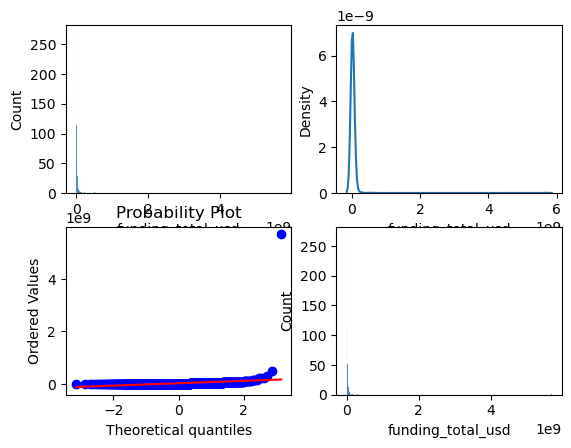

In [46]:
for feature in featuresNumfinal:
    plot_outl2(df_copy,feature)

In [47]:
np.log1p(df_copy['avg_participants'])

0      0.693147
1      1.749200
2      1.609438
3      1.466329
4      0.693147
         ...   
918    1.945910
919    1.299292
920    2.197225
921    0.693147
922    1.386294
Name: avg_participants, Length: 839, dtype: float64

In [48]:

df_copy["avg_participants"] = np.log1p(df_copy['avg_participants'])
df_copy["relationships"] = np.log1p(df_copy["relationships"])
df_copy["age_first_funding_year"] = np.log1p(df_copy["age_first_funding_year"])
df_copy["age_last_funding_year"] = np.log1p(df_copy["age_last_funding_year"])
df_copy["age_first_milestone_year"] = np.log1p(df_copy["age_first_milestone_year"])
df_copy["age_last_milestone_year"] = np.log1p(df_copy["age_last_milestone_year"])
df_copy["funding_total_usd"] = np.log1p(df_copy["funding_total_usd"])


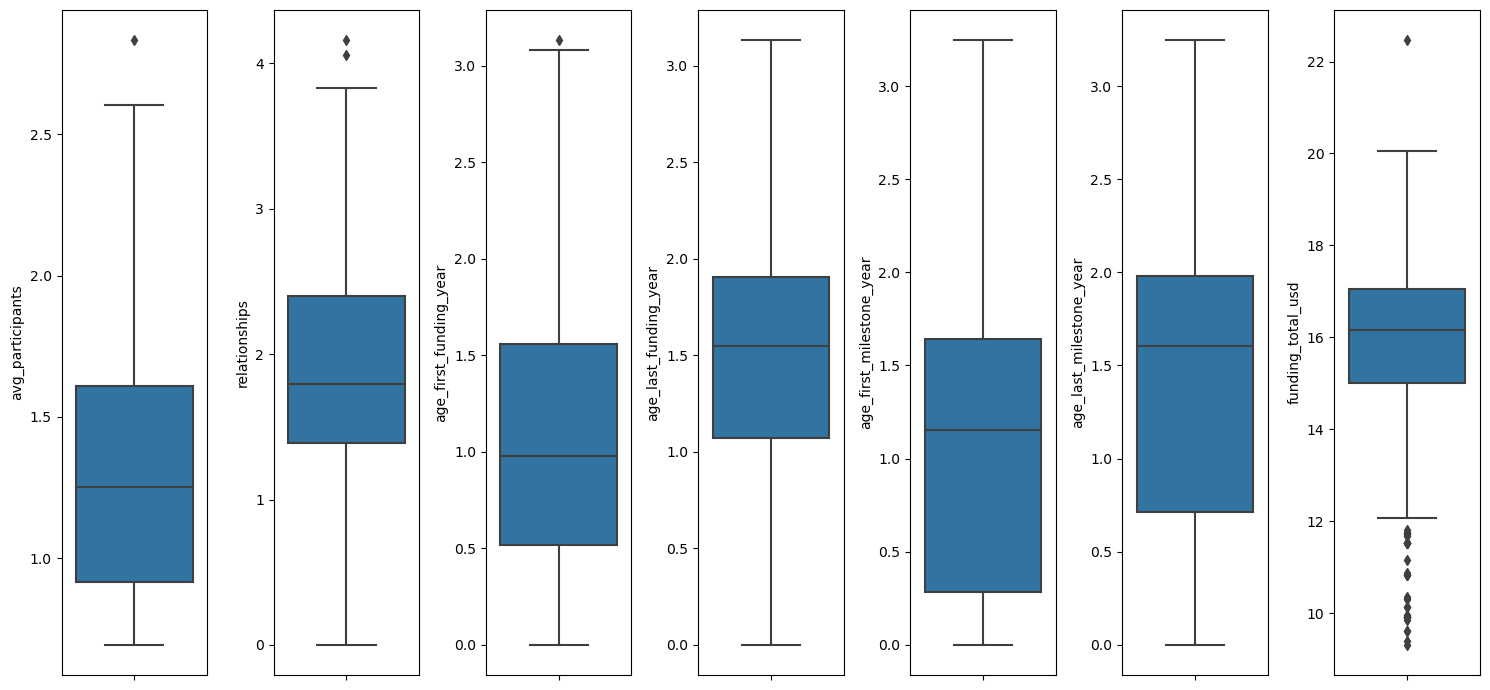

In [49]:

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=df_copy[featuresNumfinal[i]], orient='v')
    plt.tight_layout()

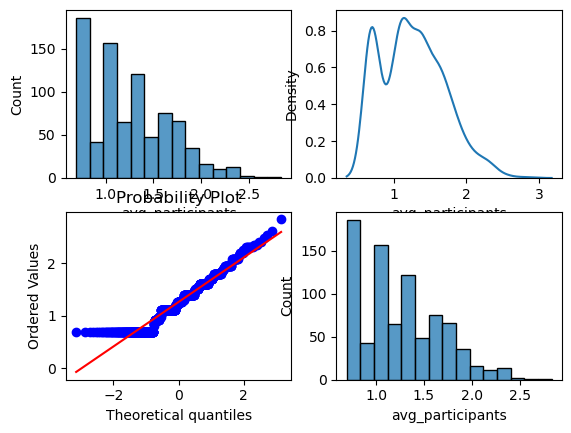

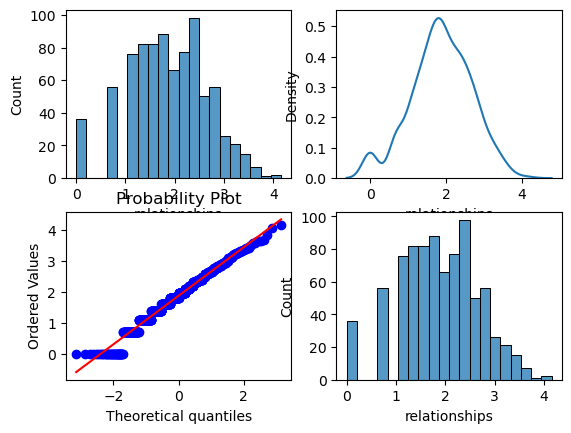

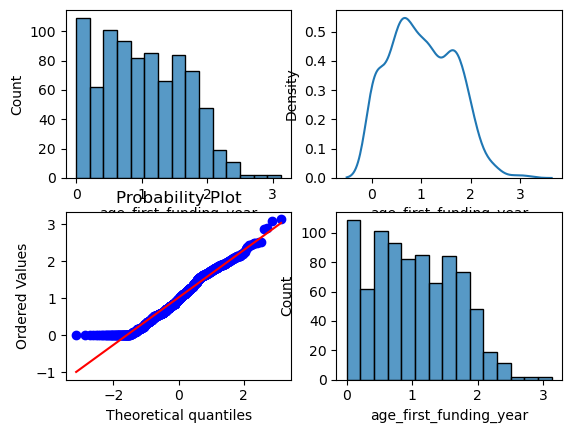

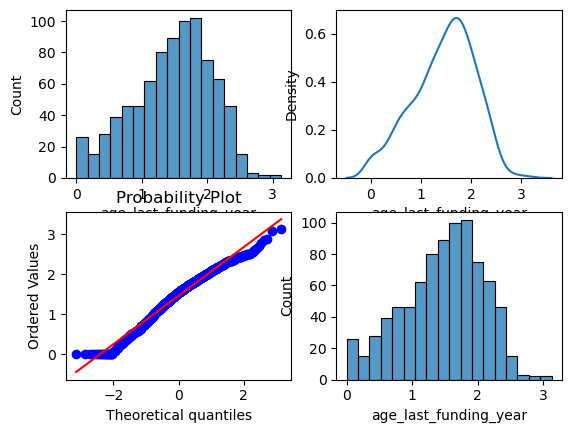

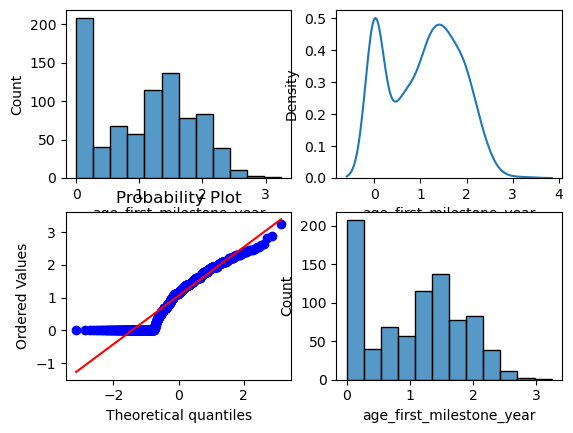

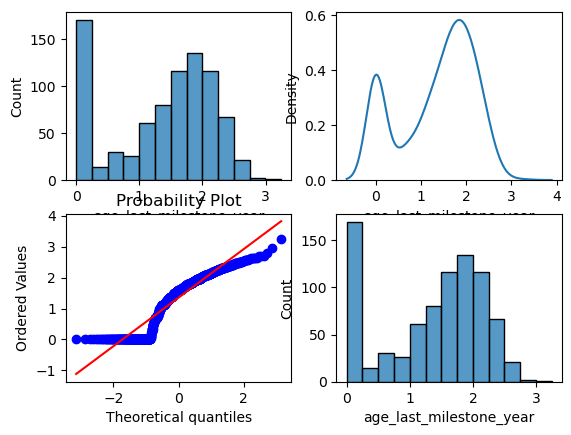

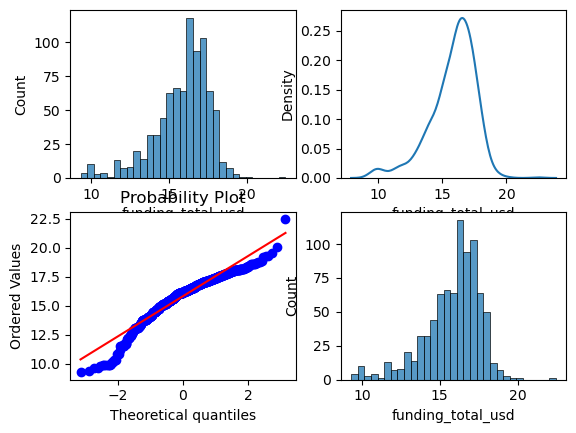

In [50]:
for feature in featuresNumfinal:
    plot_outl2(df_copy,feature)

In [51]:
df_copy['has_RoundABCD'] = np.where((df_copy['has_roundA'] == 1) | (df_copy['has_roundB'] == 1) | (df_copy['has_roundC'] == 1) | (df_copy['has_roundD'] == 1), 1, 0)
df_copy.head()

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD
0,CA,92101,c:6669,San Diego,Bandsintown,2007-01-01,NaT,2009-04-01,2010-01-01,1.178440,...,0,1,0,0,0,0,0.693147,0,1,0
1,CA,95032,c:16283,Los Gatos,TriCipher,2000-01-01,NaT,2005-02-14,2009-12-28,1.812542,...,1,0,0,1,1,1,1.749200,1,1,1
2,CA,92121,c:65620,San Diego,Plixi,2009-03-18,NaT,2010-03-30,2010-03-30,0.709463,...,0,0,1,0,0,0,1.609438,1,1,1
3,CA,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,NaT,2005-02-17,2007-04-25,1.418641,...,0,0,0,1,1,1,1.466329,1,1,1
4,CA,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.000000,...,1,1,0,0,0,0,0.693147,1,0,0


In [52]:
df_copy['has_Investor'] = np.where((df_copy['has_VC'] == 1) | (df_copy['has_angel'] == 1), 1, 0)
df_copy.head()

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor
0,CA,92101,c:6669,San Diego,Bandsintown,2007-01-01,NaT,2009-04-01,2010-01-01,1.178440,...,1,0,0,0,0,0.693147,0,1,0,1
1,CA,95032,c:16283,Los Gatos,TriCipher,2000-01-01,NaT,2005-02-14,2009-12-28,1.812542,...,0,0,1,1,1,1.749200,1,1,1,1
2,CA,92121,c:65620,San Diego,Plixi,2009-03-18,NaT,2010-03-30,2010-03-30,0.709463,...,0,1,0,0,0,1.609438,1,1,1,0
3,CA,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,NaT,2005-02-17,2007-04-25,1.418641,...,0,0,1,1,1,1.466329,1,1,1,0
4,CA,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.000000,...,1,0,0,0,0,0.693147,1,0,0,1


In [53]:
df_copy['has_Seed'] = np.where((df_copy['has_RoundABCD'] == 0) & (df_copy['has_Investor'] == 1), 1, 0)
df_copy

,state_code,zip_code,id,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,...,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,has_RoundABCD,has_Investor,has_Seed
0,CA,92101,c:6669,San Diego,Bandsintown,2007-01-01,NaT,2009-04-01,2010-01-01,1.178440,...,0,0,0,0,0.693147,0,1,0,1,1
1,CA,95032,c:16283,Los Gatos,TriCipher,2000-01-01,NaT,2005-02-14,2009-12-28,1.812542,...,0,1,1,1,1.749200,1,1,1,1,0
2,CA,92121,c:65620,San Diego,Plixi,2009-03-18,NaT,2010-03-30,2010-03-30,0.709463,...,1,0,0,0,1.609438,1,1,1,0,0
3,CA,95014,c:42668,Cupertino,Solidcore Systems,2002-01-01,NaT,2005-02-17,2007-04-25,1.418641,...,0,1,1,1,1.466329,1,1,1,0,0
4,CA,94105,c:65806,San Francisco,Inhale Digital,2010-08-01,2012-10-01,2010-08-01,2012-04-01,0.000000,...,0,0,0,0,0.693147,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,CoTweet,2009-01-01,NaT,2009-07-09,2009-07-09,0.417262,...,1,0,0,0,1.945910,1,1,1,0,0
919,MA,1803,c:41747,Burlington,Reef Point Systems,1998-01-01,2008-06-25,2005-04-01,2007-03-23,2.110468,...,0,1,0,0,1.299292,1,0,1,1,0
920,CA,94089,c:31549,Sunnyvale,Paracor Medical,1999-01-01,2012-06-17,2007-06-29,2007-06-29,2.250860,...,0,0,0,1,2.197225,1,0,1,0,0
921,CA,94404,c:33198,San Francisco,Causata,2009-01-01,NaT,2009-10-05,2011-11-01,0.564689,...,1,1,0,0,0.693147,1,1,1,0,0


In [54]:
len(df_copy[(df_copy["has_Seed"] == 1)])

179

In [55]:
df_copy['invalid_startup'] = np.where((df_copy['has_RoundABCD'] == 0) & (df_copy['has_VC'] == 0) & (df_copy['has_angel'] == 0), 1, 0)

In [56]:
len(df_copy[(df_copy["invalid_startup"] == 1)])

25

In [57]:
df_copy.columns

Index(['state_code', 'zip_code', 'id', 'city', 'name', 'founded_at',
       'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status',
       'has_RoundABCD', 'has_Investor', 'has_Seed', 'invalid_startup'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split

X = df_copy[['funding_rounds', 'funding_total_usd','is_NY','is_MA', 'is_TX', 'is_otherstate', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500',
       'has_RoundABCD', 'has_Investor', 'has_Seed', 'invalid_startup','age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships']]

y = df_copy['status']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (671, 33)
Shape of the y Train : (671,)
Shape of the X test : (168, 33)
Shape of the y test : (168,)


In [61]:
def predict_model_with_vals(ml_model):
    ml_model.fit(X_train,y_train)
    y_pred = ml_model.predict(X_test)
    print("Training Accuracy :", ml_model.score(X_train, y_train))
    print("Testing Accuracy :", ml_model.score(X_test, y_test))
    cm = confusion_matrix(y_test, y_pred)
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(cm, annot = True,  fmt = '.8g')
    plt.show()
    cr = classification_report(y_test, y_pred)
    print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8273809523809523


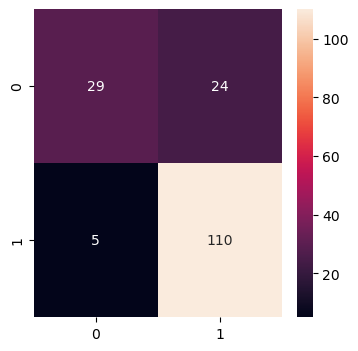

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        53
           1       0.82      0.96      0.88       115

    accuracy                           0.83       168
   macro avg       0.84      0.75      0.78       168
weighted avg       0.83      0.83      0.82       168



In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


predict_model_with_vals(RandomForestClassifier())


Training Accuracy : 1.0
Testing Accuracy : 0.8154761904761905


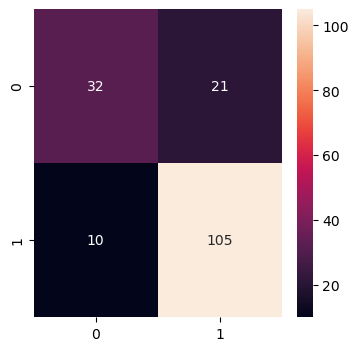

              precision    recall  f1-score   support

           0       0.76      0.60      0.67        53
           1       0.83      0.91      0.87       115

    accuracy                           0.82       168
   macro avg       0.80      0.76      0.77       168
weighted avg       0.81      0.82      0.81       168



In [63]:
from sklearn.ensemble import GradientBoostingClassifier
predict_model_with_vals(GradientBoostingClassifier(learning_rate=0.2,
                    max_depth=5,
                    random_state=100, n_estimators=1000))

In [64]:
#Cant be used since data is huge kernel died
#from sklearn.neighbors import KNeighborsClassifier
#predict_model_with_vals(KNeighborsClassifier())

In [65]:
#Logistic Regression 

Training Accuracy : 0.8002980625931445
Testing Accuracy : 0.7797619047619048


/Users/simranaswani/anaconda3/envs/tf-env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


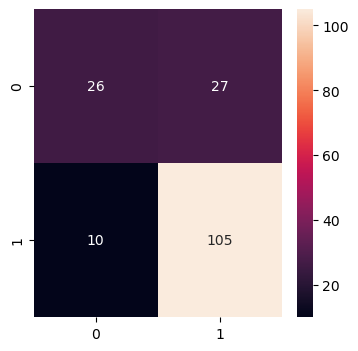

              precision    recall  f1-score   support

           0       0.72      0.49      0.58        53
           1       0.80      0.91      0.85       115

    accuracy                           0.78       168
   macro avg       0.76      0.70      0.72       168
weighted avg       0.77      0.78      0.77       168



In [66]:
from sklearn.linear_model import LogisticRegression
predict_model_with_vals( LogisticRegression(random_state = 0))

In [67]:
df_copy.to_csv("/Users/simranaswani/Downloads/final data/df_startups.csv")